In [1]:
!pip install gurobipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:

import os
import sys
# path = os.path.dirname(os.getcwd())
# sys.path.insert(0, path)

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/SVR_CG')
from Codes.model import *
from Codes.utils import *

from scipy import stats
import pickle
sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsResult')
RESULT_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsResult"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/Datasets')
DATA_DIR = "/content/gdrive/MyDrive/SVR_Codes/Datasets"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo')
DATAINFO_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo"

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets
from sklearn.preprocessing import StandardScaler



In [4]:
boston = datasets.load_boston()
X = boston.data  
y = boston.target
f = 13
K = 2
cols = [ 'X' + str(i+1) for i in range(f) ]
cols+=['Y']
scaler = StandardScaler()
df_data = scaler.fit_transform(np.c_[X,y])
df_data = pd.DataFrame(df_data, columns = cols)


In [ ]:

# EM Greedy

weights_list_greedy = []
bias_list_greedy = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    greedy = CLR(K =K , f = f, max_iter= 20, compute = True, random_state=seed )
    greedy.set_model(Cl_SVR_greedy(Kmeans_init = False, outputFlag=False, tol = 0.1, time = 0.5, step_plots=False))

    greedy.fit(df_data )


    time_list.append(greedy.run_time) 
    epsVal_list.append(greedy.model_optVal)
    weights_list_greedy.append(greedy.weights)
    bias_list_greedy.append(greedy.bias)


print("\n\nResults for EM Greedy" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_greedy = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for EM Greedy: ", epsVal_result_greedy)


time_result_greedy = np.mean(time_list)
print("Average time taken for EM Greedy ", time_result_greedy, "\n")

Clusterwise-Regression model with SVR - Greedy algorithm
# of outliers:  0
Iteration:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w:  [[-0.13911832  0.11662898 -0.02760747  0.09752157 -0.51736726 -0.02317038
   0.05144346 -0.56660821  0.75731282 -0.51020234 -0.09316089  0.13725754
  -0.84195792]
 [-0.16426296 -0.07480119  0.15095689 

In [ ]:

# KM LR Greedy

weights_list_kmlr = []
bias_list_kmlr = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kmlr = CLR(K =K , f = f, random_state=seed )
    kmlr.set_model(km_lr())
    kmlr.fit(df_data )

    time_list.append(kmlr.run_time) 
    epsVal_list.append(kmlr.model_optVal)
    weights_list_kmlr.append(kmlr.weights)
    bias_list_kmlr.append(kmlr.bias)


print("\n\nResults for kmlr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmlr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmlr: ", epsVal_result_kmlr)


time_result_kmlr = np.mean(time_list)
print("Average time taken for kmlr ", time_result_kmlr, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.3438676162116696


Results for kmlr



In [ ]:

# KM SVR Greedy

weights_list_kmsvr = []
bias_list_kmsvr = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmsvr = CLR(K =K , f = f, random_state=seed )
    kmsvr.set_model(km_svr(epsilon = 1))
    kmsvr.fit(df_data )

    time_list.append(kmsvr.run_time) 
    epsVal_list.append(kmsvr.model_optVal)
    weights_list_kmsvr.append(kmsvr.weights)
    bias_list_kmsvr.append(kmsvr.bias)


print("\n\nResults for kmsvr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmsvr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmsvr ", epsVal_result_kmsvr)


time_result_kmsvr = np.mean(time_list)
print("Average time taken for kmsvr ", time_result_kmsvr, "\n")

9
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.0209262528096734
63
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.0209262528096734
100
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.0209262528096734
166
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.0209262528096734
20
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.0209262528096734
151
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.0209262528096734
37
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.0209262528096734
125
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.0209262528096734
35
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  2.0209262528096734
15
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxErro

In [5]:

# KM et Greedy

weights_list_kmet = []
bias_list_kmet = []
metrics_list = []
time_list=[]
epsVal_list = []


for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmet = CLR(K =K , f = f, compute = True, random_state=seed )
    kmet.set_model(km_et(outputFlag= False))
    kmet.fit(df_data )

    time_list.append(kmet.run_time) 
    epsVal_list.append(kmet.model_optVal)
    weights_list_kmet.append(kmet.weights)
    bias_list_kmet.append(kmet.bias)


print("\n\nResults for kmet" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmet = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmet ", epsVal_result_kmet)


time_result_kmet = np.mean(time_list)
print("Average time taken for kmet ", time_result_kmet, "\n")

168
Clusterwise-Regression model with Kmeans-et
# of outliers:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w:  [[ 2.58654906e+00 -5.52069850e-03  4.82633611e-02  1.69954581e-03
  -1.99229034e-01  6.36592600e-01 -2.29804550e-01 -3.03354584e-01
   1.78379775e-01 -3.90756180e-01 -2.50853879e-01  3.30327761e-01
  -2.35347023e-01]
 [-1.89

In [6]:


with open(os.path.join(RESULT_DIR, 'Housing3.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmet, outp, pickle.HIGHEST_PROTOCOL)



In [ ]:

# kplane Greedy

weights_list_kp = []
bias_list_kp = []
time_list = []
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kp = CLR(K =K , f = f, max_iter= 10, random_state=seed )
    kp.set_model(k_plane())
    kp.fit(df_data )

    time_list.append(kp.run_time) 
    epsVal_list.append(kp.model_optVal)
    weights_list_kp.append(kp.weights)
    bias_list_kp.append(kp.bias)


print("\n\nResults for k plane" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kp = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for k plane: ", epsVal_result_kp)


time_result_kp = np.mean(time_list)
print("Average time taken for k plane ", time_result_kp, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.073952778086631
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9826914284071486
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.3816452048266252
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9205602413488707
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.43685274832826
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.170922348297263
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.1893571156649307
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.5348855383150999
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4054658289884587
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.5073068089913948


Results for k plane

M

In [ ]:

# Clusterwise SVR with constraint generation 

optcg = CLR(K =K , f = f, max_iter= 40, compute = True, random_state=243)
optcg.set_model(Cl_SVR_Cg(outputFlag=False, initConstrCnt=30, optimalGap= 0.05, tol = 0.4, time = 2, initConstrIntRatio= 6, outliersCnt = 0, step_plots=False))

optcg.fit(df_data )


weights_optcg = optcg.weights
bias_optcg = optcg.bias
optgap_optcg = optcg.model_optGap
optVal_optcg = optcg.model_optVal


print("\n\nResults for CG" )

print("EpsVal for CG: ", optVal_optcg)

time_result_optcg = optcg.run_time
print("Time taken for CG ", time_result_optcg, "\n")


Clusterwise-Regression model with SVR - Constraint generation
# of outliers:  0
greedy objective:  0.21619853875377731
greedy objective:  0.215824408598045
greedy objective:  0.27996636251364815
greedy objective:  0.2805101014860595
greedy objective kmlr:  0.2865944151074519
Max error for warm starting model:  2.2231163859124266
Number of WS constraints:  70
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.12713637  0.41769404  0.27058943  0.3597858  -0.73293142 -0.2109751
   0.14751131 -0.60801667  0.46927482 -0.36211187 -0.45450915  0.04445119
  -0.67175321]
 [-0.1059218  -0.03648649  0.01562385  0.02038676 -0.03882426  0.74934209
  -0.2433785  -0.21726035  0.1710028  -0.19781797 -0.18651814  0.21394633
   0.03503647]]
b at WS:  [[ 0.25769649]
 [-0.07724487]]
Set parameter TimeLimit to value 120
Set parameter MIPGap to value 0.05
Acad

Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective:  0.2193798639891083
greedy objective:  0.21501987639091333
greedy objective:  0.28170680607408466
greedy objective:  0.28112159310494744
greedy objective kmlr:  0.2865944151074519
Max error for warm starting model:  1.1563278320190553
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.17069216  0.2406173  -0.09468354  0.11824053 -0.83305215  0.23849652
   0.11770341 -1.13473266  0.53257435  0.02427086 -0.37509271  0.08395989
  -0.57460793]
 [-0.11111449 -0.01854093  0.0064335   0.02401765 -0.09327956  0.32950523
  -0.11356185 -0.09456156  0.16735195 -0.25205947 -0.19324792  0.09137537
  -0.18631647]]
b at WS:  [[ 0.33531919]
 [-0.16133563]]
Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - 

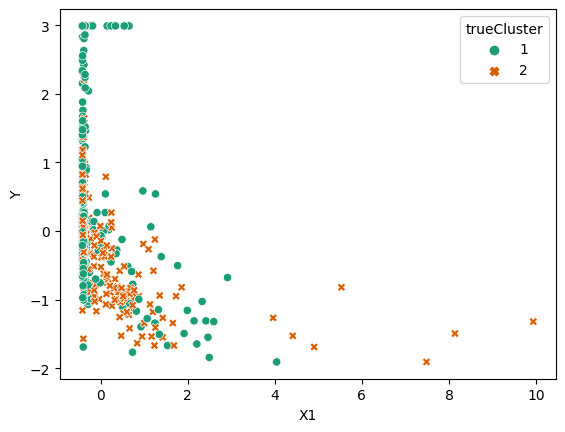

Solution reached with Cost:  0.7485326979779282


Results for full MILP
EpsVal for full MILP:  0.7485326979779282
Time taken for full MILP  600.2539233120006 



In [ ]:

# Clusterwise SVR with full MILP

optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = 10))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective kmlr:  0.2865944151074519
Best WS is kmlr
Max error for warm starting model:  2.3438676162116696
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-1.51977460e-01 -7.01256539e-17 -1.33040799e-01  1.46076932e-01
  -3.64698575e-01 -1.02476153e-01 -1.77358162e-02 -9.36577103e-01
   2.49092133e-01 -2.02723917e-01 -1.22358977e-01  5.70438051e-02
  -5.84677772e-01]
 [ 1.60623463e+00  4.73954610e-02  2.20969246e-02  3.68921924e-02
  -4.49295581e-02  7.30213026e-01 -1.86776646e-01 -1.92604317e-01
   1.97551275e-01 -2.48970864e-01 -1.42728215e-01  1.47375474e-01
  -1.79396584e-02]]
b at WS:  [[-0.26561378]
 [ 0.64198718]]
Set parameter TimeLimit to value 2642.2226
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.ch

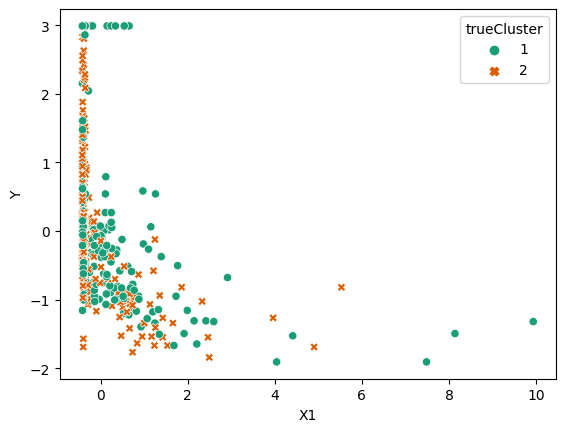

Solution reached with Cost:  0.7797534203939511


Results for full MILP
EpsVal for full MILP:  0.7797534203939511
Time taken for full MILP  2642.4501890770002 



In [ ]:

# Clusterwise SVR with full MILP (time of cg)
time_result_optcg = 2642.2226
optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = time_result_optcg/60))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


In [ ]:


with open(os.path.join(RESULT_DIR, 'Housing2.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)


In [ ]:

# Save the final results 


with open(os.path.join(RESULT_DIR, 'Housing.pkl'), 'wb') as outp:



    pickle.dump(weights_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_greedy, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    
    pickle.dump(weights_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kp, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optcg, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)



n, d = X.shape

with open(os.path.join(DATAINFO_DIR, 'Housing.pkl'), 'wb') as outp:

    pickle.dump(n, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(d, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(K, outp, pickle.HIGHEST_PROTOCOL)

